In [1]:
import pandas as pd

In [2]:
train_source_file = '/usr/src/tp2-1/210227_tp2_train_feng.csv'
test_source_file = '/usr/src/tp2-1/210227_tp2_test_feng.csv'
kaggle_predict_file =  '/usr/src/tp2-1/210227_random_forest_TimeSeriesSplit.csv'

In [3]:
df_train_feng = pd.read_csv(train_source_file)

In [4]:
df_train_feng.shape

(9791, 2868)

In [5]:
X = df_train_feng.drop(columns = 'Stage')
y = df_train_feng['Stage']

In [6]:
X.shape

(9791, 2867)

In [7]:
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid
import numpy as np

In [8]:
from sklearn.ensemble import RandomForestRegressor

splits = TimeSeriesSplit(n_splits=3, max_train_size=365*2)
rfr = RandomForestRegressor()

# Create a dictionary of hyperparameters to search
rfr_grid = {"n_estimators": [10, 20, 30, 40, 50, 100], 
        'max_depth': [3, 5, 8, 10, 12], 
        'max_features': [4, 8, 16, 32, 59], 
        'random_state': [123]}

rfr_paramGrid = ParameterGrid(rfr_grid)

def TimeSplit_ModBuild(model, paramGrid, splits, X, y):
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error

    #Loop over each time split and for each
    for train_index, val_index in splits.split(X):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]

        train_scores = []
        val_scores = []
        #models = []
        
        # Loop through the parameter grid, set the hyperparameters, and save the scores
        for g in paramGrid:
            model.set_params(**g)
            model.fit(_X_train_, _y_train_)
            p_train = model.predict(_X_train_)
            p_val = model.predict(_X_val_)
            score_train = np.mean(mean_squared_error(_y_train_, p_train))
            score_val = np.mean(mean_squared_error(_y_val_, p_val))
            train_scores.append(score_train)
            val_scores.append(score_val)
            #models.append(model)
            best_idx = np.argmin(val_scores)
            
        print("Best-Fold HyperParams:: ", paramGrid[best_idx])
        print("Best-Fold Train RMSE: ", train_scores[best_idx])
        print("Best-Fold Val RMSE: ",val_scores[best_idx])
        print("\n")
        
    #Return most recent model
    return train_scores, val_scores, best_idx


CV_rfr_tup = TimeSplit_ModBuild(rfr, rfr_paramGrid, splits, X, y)

Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 20, 'max_features': 59, 'max_depth': 12}
Best-Fold Train RMSE:  0.07086579877881519
Best-Fold Val RMSE:  0.16744309567525462


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 100, 'max_features': 59, 'max_depth': 12}
Best-Fold Train RMSE:  0.07953735682771122
Best-Fold Val RMSE:  0.1808170940666602


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 20, 'max_features': 59, 'max_depth': 10}
Best-Fold Train RMSE:  0.11246033714439639
Best-Fold Val RMSE:  0.1638176507303994




In [9]:
df_frio_frio_test = pd.read_csv(test_source_file)

In [10]:
df_frio_frio_test

,Unnamed: 0,Opportunity_ID,Region_APAC,Region_Americas,Region_EMEA,Region_Japan,Region_Middle East,Territory_Albania,Territory_Armenia,Territory_Australia,...,Total_Amount_sum,Planned_Delivery_Date_diff,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Quote_Type,Delivery_Year,TRF
0,0,10689,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,367419.0,30.0,1.0,1.0,1.0,1.0,0.0,0.0,2019.0,0.0
1,1,10690,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,757783.5,27.4,1.0,1.0,1.0,1.0,0.0,0.0,2019.0,0.2
2,2,10691,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21037.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2019.0,0.0
3,3,10692,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2169106.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2019.0,1.0
4,4,10693,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5752.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1562,12364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,147750.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,2019.0,0.0
1563,1563,12365,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45054.9,91.0,1.0,1.0,0.0,0.0,0.0,0.0,2019.0,0.0
1564,1564,12366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100122.0,91.0,1.0,1.0,1.0,1.0,0.0,0.0,2019.0,0.0
1565,1565,12367,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,143220.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2019.0,0.0


In [11]:
best_rfr_idx = CV_rfr_tup[2]

In [12]:
best_rfr_grid = rfr_paramGrid[best_rfr_idx]

best_rfr = RandomForestRegressor()
best_rfr.set_params(**best_rfr_grid)


RandomForestRegressor(max_depth=10, max_features=59, n_estimators=20,
                      random_state=123)

In [13]:
best_rfr.fit(X, y)

RandomForestRegressor(max_depth=10, max_features=59, n_estimators=20,
                      random_state=123)

In [14]:
predicts = best_rfr.predict(df_frio_frio_test)


In [15]:
predicts

array([0.58576202, 0.53712465, 0.69021093, ..., 0.53545808, 0.56985299,
       0.31935487])

In [16]:
output = pd.DataFrame({'Opportunity_ID':df_frio_frio_test.Opportunity_ID, 'Target': predicts})


In [17]:
final=output.groupby('Opportunity_ID').mean()
final

,Target
Opportunity_ID,
10689,0.585762
10690,0.537125
10691,0.690211
10692,0.418541
10693,0.725301
...,...
12364,0.656015
12365,0.565009
12366,0.535458


In [18]:
output.to_csv(kaggle_predict_file, index=False)

In [19]:
'''
    de aqui en adelante eran pruebas para ver si puedo determinar que features tiene mayor
    peso para mejorar el feng
'''

'\n    de aqui en adelante eran pruebas para ver si puedo determinar que features tiene mayor\n    peso para mejorar el feng\n'

In [20]:
import matplotlib.pyplot as plt

In [21]:
rfr.feature_importances_

array([1.91391963e-02, 1.71044031e-02, 2.67533527e-03, ...,
       5.46848449e-05, 3.53900961e-03, 4.44069448e-02])

In [26]:
rfr_series = pd.Series(rfr.feature_importances_)

In [30]:
X_series = pd.Series(X.columns)

In [40]:
Comb = pd.concat([X_series, rfr_series], axis=1)
type(Comb)

pandas.core.frame.DataFrame

In [51]:
Comb.nlargest(20, 1)[0]

2856                           Total_Amount
2866                                    TRF
2857                       Total_Amount_sum
2858             Planned_Delivery_Date_diff
1984                Product_Category_B_None
1977                              Size_None
2854                                    ASP
1970                      Product_Type_None
0                                Unnamed: 0
1968                             Brand_None
1                            Opportunity_ID
2066                          Currency_None
2855                        ASP_(converted)
5                              Region_Japan
2795                       ASP_Currency_JPY
1932    Opportunity_Type_Opportunity_Type_7
2851      Total_Taxable_Amount_Currency_JPY
2843                    Delivery_Quarter_Q1
1834           Account_Owner_Person_Name_50
2063                             Price_None
Name: 0, dtype: object

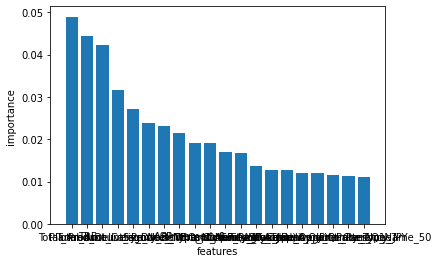

In [50]:
plt.bar(Comb.nlargest(20, 1)[0], Comb.nlargest(20, 1)[1])
plt.xlabel('features')
plt.ylabel('importance ')
plt.show()